# Линейная регрессия

**Выполнил Мелехин Николай Сергеевич**

Решение задачи регрессии в scikit-learn с помощью линейной модели - линейная регрессия

- Обучение класса SGDRegressor и анализ атрибутов
- Анализ модели для разных данных
- Предобразование целевой переменной с помощью класса TransformedTargetRegressor
- Сохранение модели

## Установка и импорт библиотек

In [1]:
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install plotly
%pip install seaborn
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd # Библиотека Pandas для работы с табличными данными
import numpy as np # библиотека Numpy для операций линейной алгебры и прочего
import matplotlib.pyplot as plt # библиотека Matplotlib для визуализации
import seaborn as sns # библиотека seaborn для визуализации
import numpy as np # библиотека Numpy для операций линейной алгебры и прочего
import plotly.graph_objects as go # Библиотека Plotly. Модуль "Graph Objects"
import plotly.express as px # Библиотека Plotly. Модуль "Express"

# предварительная обработка числовых признаков
from sklearn.preprocessing import MinMaxScaler# Импортируем нормализацию от scikit-learn
from sklearn.preprocessing import StandardScaler # Импортируем стандартизацию от scikit-learn
from sklearn.preprocessing import PowerTransformer  # Степенное преобразование от scikit-learn
# предварительная обработка категориальных признаков
from sklearn.preprocessing import OneHotEncoder# Импортируем One-Hot Encoding от scikit-learn
from sklearn.preprocessing import OrdinalEncoder# Импортируем Порядковое кодированиеот scikit-learn

from sklearn.pipeline import Pipeline # Pipeline.Не добавить, не убавить

from sklearn.compose import ColumnTransformer # т.н. преобразователь колонок

from sklearn.base import BaseEstimator, TransformerMixin # для создания собственных преобразователей / трансформеров данных

from sklearn.compose import TransformedTargetRegressor # ддля обрабоки целевой переменной

import warnings
warnings.filterwarnings('ignore')

# Описание датасета

'index': Индекс записи

'Publishing Year': Год когда книга опубликована

'Book Name': Название книги

'Author': Автор

'language_code': Язык книги

'Author_Rating': Рейтинг автора

'Book_average_rating': Средний рейтинг книги

'Book_ratings_count':  Количество данных рейтингов для книги

'genre': Жанр

'gross sales': Валовой объем продаж

'publisher revenue': Прибыль для издателя

'sale price':  Цена книги

'sales rank': Ранг продаж для книги

'Publisher': Издатель

'units sold': Количество проданных копий

Ссылка на датасет: https://www.kaggle.com/datasets/thedevastator/books-sales-and-ratings

Целью данной работы будет нахождением зависимости между различными факторами книги и результативным фактором - валовым объемом продаж.

In [429]:
df = pd.read_csv('Books_Data_Clean.csv')  # Считываем файл в DataFrame
df.head(5)  # Посмотрим первые пять записей

,index,Publishing Year,Book Name,Author,language_code,Author_Rating,Book_average_rating,Book_ratings_count,genre,gross sales,publisher revenue,sale price,sales rank,Publisher,units sold
0,0,1975.0,Beowulf,"Unknown, Seamus Heaney",en-US,Novice,3.42,155903,genre fiction,34160.0,20496.0,4.88,1,HarperCollins Publishers,7000
1,1,1987.0,Batman: Year One,"Frank Miller, David Mazzucchelli, Richmond Lew...",eng,Intermediate,4.23,145267,genre fiction,12437.5,7462.5,1.99,2,HarperCollins Publishers,6250
2,2,2015.0,Go Set a Watchman,Harper Lee,eng,Novice,3.31,138669,genre fiction,47795.0,28677.0,8.69,3,"Amazon Digital Services, Inc.",5500
3,3,2008.0,When You Are Engulfed in Flames,David Sedaris,en-US,Intermediate,4.04,150898,fiction,41250.0,24750.0,7.50,3,Hachette Book Group,5500
4,4,2011.0,Daughter of Smoke & Bone,Laini Taylor,eng,Intermediate,4.04,198283,genre fiction,37952.5,22771.5,7.99,4,Penguin Group (USA) LLC,4750


In [430]:
df.info()  # Выведем краткую сводку по датафрейму

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                1070 non-null   int64  
 1   Publishing Year      1069 non-null   float64
 2   Book Name            1047 non-null   object 
 3   Author               1070 non-null   object 
 4   language_code        1017 non-null   object 
 5   Author_Rating        1070 non-null   object 
 6   Book_average_rating  1070 non-null   float64
 7   Book_ratings_count   1070 non-null   int64  
 8   genre                1070 non-null   object 
 9   gross sales          1070 non-null   float64
 10  publisher revenue    1070 non-null   float64
 11  sale price           1070 non-null   float64
 12  sales rank           1070 non-null   int64  
 13  Publisher            1070 non-null   object 
 14  units sold           1070 non-null   int64  
dtypes: float64(5), int64(4), object(6)
mem

In [432]:
ancient_books = df.loc[(df['Publishing Year']<0)]
df = df.drop(index=[241,293,568,589,749,990])

In [433]:
df = df.dropna(subset=['Publishing Year', 'Book Name']) #Удалим строку без значения
df['language_code'].fillna('eng', inplace = True)  # Заменим пропуски на самое часто встречающее значение - eng

In [434]:
#Удалим дубликаты - индекс и название книги
df = df.drop(['index'], axis=1)
#Удалим результативные признаки - количество проданных копий, прибыль издателя, рейтинг продаж
#df = df.drop(['gross sales', 'publisher revenue', 'sales rank'], axis=1)
df = df.drop(['sales rank'], axis=1)

In [435]:
#Заменим год на возраст
df['Publishing Year'] = 2024 - df['Publishing Year']
df.rename(columns = {'Publishing Year':'Age'}, inplace = True )

In [436]:
df.info()  # Выведем краткую сводку по датафрейму

<class 'pandas.core.frame.DataFrame'>
Index: 1041 entries, 0 to 1069
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  1041 non-null   float64
 1   Book Name            1041 non-null   object 
 2   Author               1041 non-null   object 
 3   language_code        1041 non-null   object 
 4   Author_Rating        1041 non-null   object 
 5   Book_average_rating  1041 non-null   float64
 6   Book_ratings_count   1041 non-null   int64  
 7   genre                1041 non-null   object 
 8   gross sales          1041 non-null   float64
 9   publisher revenue    1041 non-null   float64
 10  sale price           1041 non-null   float64
 11  Publisher            1041 non-null   object 
 12  units sold           1041 non-null   int64  
dtypes: float64(5), int64(2), object(6)
memory usage: 113.9+ KB


In [437]:
df.head(5)

,Age,Book Name,Author,language_code,Author_Rating,Book_average_rating,Book_ratings_count,genre,gross sales,publisher revenue,sale price,Publisher,units sold
0,49.0,Beowulf,"Unknown, Seamus Heaney",en-US,Novice,3.42,155903,genre fiction,34160.0,20496.0,4.88,HarperCollins Publishers,7000
1,37.0,Batman: Year One,"Frank Miller, David Mazzucchelli, Richmond Lew...",eng,Intermediate,4.23,145267,genre fiction,12437.5,7462.5,1.99,HarperCollins Publishers,6250
2,9.0,Go Set a Watchman,Harper Lee,eng,Novice,3.31,138669,genre fiction,47795.0,28677.0,8.69,"Amazon Digital Services, Inc.",5500
3,16.0,When You Are Engulfed in Flames,David Sedaris,en-US,Intermediate,4.04,150898,fiction,41250.0,24750.0,7.50,Hachette Book Group,5500
4,13.0,Daughter of Smoke & Bone,Laini Taylor,eng,Intermediate,4.04,198283,genre fiction,37952.5,22771.5,7.99,Penguin Group (USA) LLC,4750


## Числовые и категориальные признаки

Из предварительной обработки исключена колонка gross sales(поскольку она является результативной)

In [438]:
class QuantileReplacer(BaseEstimator, TransformerMixin):
    def __init__(self, threshold=0.05):
        self.threshold = threshold
        self.quantiles = {}

    def fit(self, X, y=None):
        for col in X.select_dtypes(include='number'):
            low_quantile = X[col].quantile(self.threshold)
            high_quantile = X[col].quantile(1 - self.threshold)
            self.quantiles[col] = (low_quantile, high_quantile)
        return self

    def transform(self, X):
        X_copy = X.copy()
        for col in X.select_dtypes(include='number'):
            low_quantile, high_quantile = self.quantiles[col]
            rare_mask = ((X[col] < low_quantile) | (X[col] > high_quantile))
            if rare_mask.any():
                rare_values = X_copy.loc[rare_mask, col]
                replace_value = np.mean([low_quantile, high_quantile])
                if rare_values.mean() > replace_value:
                    X_copy.loc[rare_mask, col] = high_quantile
                else:
                    X_copy.loc[rare_mask, col] = low_quantile
        return X_copy

In [439]:
class RareGrouper(BaseEstimator, TransformerMixin):
    def __init__(self, threshold=0.05, other_value='Other'):
        self.threshold = threshold
        self.other_value = other_value
        self.freq_dict = {}

    def fit(self, X, y=None):
        for col in X.select_dtypes(include=['object']):
            freq = X[col].value_counts(normalize=True)
            self.freq_dict[col] = freq[freq >= self.threshold].index.tolist()
        return self

    def transform(self, X, y=None):
        X_copy = X.copy()
        for col in X.select_dtypes(include=['object']):
            X_copy[col] = X_copy[col].apply(lambda x: x if x in self.freq_dict[col] else self.other_value)
        return X_copy

In [520]:
# Pipeline для числовых признаков

num_pipe_num = Pipeline([
    ('QuantReplace', QuantileReplacer(threshold=0.01, )),
    ('norm', MinMaxScaler())
])
 
num = ['Age', 'Book_average_rating', 'Book_ratings_count', 'sale price', 'gross sales', 'publisher revenue']

# И для категориальных признаков

cat_pipe_Status_Touch = Pipeline([
    ('encoder', OrdinalEncoder())
])


cat_Status_Touch = ['Author_Rating', 'genre']

cat_pipe = Pipeline([
    ('replace_rare', RareGrouper(threshold=0.0001, other_value='Other')),
    ('encoder', OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse_output=False))
])

cat = ['Author_Rating', 'Author', 'language_code', 'genre', 'Publisher']


# Сделаем отдельно Pipeline с числовыми признаками
preprocessors_num = ColumnTransformer(transformers=[
    ('num', num_pipe_num, num),
])


# И полный Pipeline со всеми признаками
preprocessors_All = ColumnTransformer(transformers=[
    ('norm', num_pipe_num, num),
    ('Status_Touch', cat_pipe_Status_Touch, cat_Status_Touch),
    ('cat', cat_pipe, cat)
])

In [521]:
columns_num = np.hstack([num])

# Линейная Регрессия

In [522]:
from sklearn.linear_model import SGDRegressor # Линейная регрессия с градиентным спуском от scikit-learn

from sklearn.model_selection import train_test_split  # Функция разбиения на тренировочную и тестовую выборку
# в исполнении scikit-learn
from sklearn.model_selection import ShuffleSplit  # При кросс-валидации случайно перемешиваем данные
from sklearn.model_selection import cross_validate  # Функция кросс-валидации от Scikit-learn

from sklearn.metrics import mean_squared_error as mse  # Метрика MSE от Scikit-learn
from sklearn.metrics import r2_score  # Коэффициент детерминации R2 от Scikit-learn

from sklearn.metrics import PredictionErrorDisplay  # Класс визуализации ошибок модели

In [523]:
# Не забываем удалить целевую переменную цену из признаков
X,y = df.drop(columns = ['units sold']), df['units sold']

# Разбиваем датасет на обучающую и валидационную выборку
X_train, X_val, y_train, y_val = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42)

In [484]:
X_train  # Посмотрим содержимое обучающей выборки

,Age,Book Name,Author,language_code,Author_Rating,Book_average_rating,Book_ratings_count,genre,gross sales,publisher revenue,sale price,Publisher
954,37.0,The Black Dahlia,James Ellroy,en-US,Intermediate,3.75,61412,genre fiction,1088.91,653.346,9.99,Random House LLC
871,32.0,The Stinky Cheese Man and Other Fairly Stupid ...,"Jon Scieszka, Lane Smith",eng,Excellent,4.20,78487,nonfiction,334.88,200.928,2.99,"Amazon Digital Services, Inc."
121,18.0,"Definitely Dead (Sookie Stackhouse, #6)",Charlaine Harris,en-US,Intermediate,4.02,163054,genre fiction,6525.00,3915.000,7.50,Simon and Schuster Digital Sales Inc
727,44.0,The Twits,"Roald Dahl, Quentin Blake",eng,Intermediate,3.94,82458,genre fiction,855.27,513.162,7.31,Random House LLC
257,31.0,Trainspotting,"Irvine Welsh, Eric Lindor Fall",fre,Intermediate,4.07,59453,genre fiction,1100.32,660.192,2.99,Random House LLC
...,...,...,...,...,...,...,...,...,...,...,...,...
89,42.0,The Mists of Avalon,Marion Zimmer Bradley,eng,Intermediate,4.12,157736,genre fiction,1157.31,694.386,0.99,"Amazon Digital Services, Inc."
339,19.0,Team of Rivals: The Political Genius of Abraha...,"Doris Kearns Goodwin, Suzanne Toren",eng,Excellent,4.30,102923,genre fiction,726.57,435.942,2.99,"Amazon Digital Services, Inc."
478,11.0,The Interestings,Meg Wolitzer,eng,Intermediate,3.54,76566,genre fiction,1342.32,805.392,7.99,HarperCollins Publishers
124,13.0,Crossed,Ally Condie,eng,Intermediate,3.52,100886,genre fiction,841.50,504.900,0.99,"Amazon Digital Services, Inc."


# Оценим модель с использованием только числовых признаков

In [485]:
#  На тренировочных данных делаем fit_transform - одновременно и обучаемся, и преобразуем тренировочные данные
X_train_prep = preprocessors_num.fit_transform(X_train)
# После на валидационных данных делаем уже только transform - преобразуем данные согласно ранее запомненным параметрам, полученным на тренировочной выборке
X_val_prep = preprocessors_num.transform(X_val)

### Обучаем модель

In [486]:
model = SGDRegressor(random_state = 42)  # Суть параметра random_state (во всех функциях и методах из SciKit-Learn) в воспроизводимых случайных значениях. 
                                         # Т.е. если явно задать значение random_state отличным от None - то генерируемые псевдослучайные величины будут иметь 
                                         # одни и те же значения при каждом вызове.

model.fit(X_train_prep, y_train);  # Обучаем модель на тренировочной выборке

## Подготовим несколько функций для анализа обученной модели

Извлечение коэффициентов из модели

In [487]:
def get_coefs(model):  # model: наша обученная модель

    B0 = model.intercept_[0]
    B = model.coef_
    return B0, B

In [488]:
def print_model (B0,B,features_names):
    """Написание уравнения модели.
    Входные переменные:
    ===========
    B0: смещение (независимый коэффициент)
    weights: веса признаков
    features_names: список названий признаков
    """
    line='{:.3f}'.format(B0)
    sign=['+','-']
    for p,(fn,b) in enumerate(zip(features_names,B)):
        line=line+sign[int(0.5*(np.sign(b)-1))]+'{:.2f}*'.format(np.abs(b))+fn

    print('Решение')
    print(line)

## Визуализации весов в виде столбчатых диаграмм

In [489]:
def vis_weigths(weights,features_names = None, width = 1200, height = 600):
    """Отрисовка весов.
    Входные переменные:
    ===========
    weights: веса признаков
    features_names: список названий признаков
    """
    numbers = np.arange(0,len(weights))                 # создаем массив от 0 до количество весов-1
    if features_names:
        tick_labels = np.hstack(['B0',features_names])
    else:
        tick_labels = ['B'+str(num) for num in numbers]  # создаем "названия" весов
    fig = go.Figure()
    fig.add_trace(go.Bar(x=numbers[weights<0], y=weights[weights<0],
                    marker_color='red',
                    name='отрицательные веса'))
    fig.add_trace(go.Bar(x=numbers[weights>=0], y=weights[weights>=0],
                    marker_color='blue',
                    name='положительные веса'
                    ))

    fig.update_layout(
                title="Веса модели",
                width=width,
                height=height,
                template = "plotly_dark",
                xaxis = dict(
                                         tickmode = 'array',
                                         tickvals = numbers,
                                         ticktext = tick_labels,
                                         )
                )

    fig.show()

### Напишем уравнение модели

In [490]:
B0, B = get_coefs(model)
features_names = list(columns_num)
print_model(B0,B,features_names)

Решение
14402.717-1259.42*Age+1979.23*Book_average_rating-12844.76*Book_ratings_count+111.83*sale price-8150.47*gross sales-1992.76*publisher revenue


### Визуализируем веса в виде столбчатых диаграмм

In [491]:
Bs = np.hstack([B0,B])
vis_weigths(Bs,features_names)

Признаки sale price (цена книги) и book_ratings_count (количество рейтингов) имеют наибольшие коэффициенты, следовательно они больше всего влияют на целевой показатель - продажи. Также признак Book_average_rating имеет отрицательный коэффициент - это означает, что книги с более высоким средним рейтингом не обязательно будут продаваться лучше чем не с высоким. Возраст книги на продажи значительно не влияет.

### Оценка метрик

In [492]:
def calculate_metric(model_pipe, X, y, metric = r2_score, **kwargs):
    """Расчет метрики.
    Параметры:
    ===========
    model_pipe: модель или pipeline
    X: признаки
    y: истинные значения
    metric: метрика (r2 - по умолчанию)
    """
    y_model = model_pipe.predict(X)
    return metric(y, y_model, **kwargs)

In [493]:
print(f"r2 на тренировочной выборке: {calculate_metric(model, X_train_prep, y_train):.4f}")
print(f"r2 на валидационной выборке: {calculate_metric(model, X_val_prep, y_val):.4f}")

print(f"mse на тренировочной выборке: {calculate_metric(model, X_train_prep, y_train, mse):.4f}")
print(f"mse на валидационной выборке: {calculate_metric(model, X_val_prep, y_val, mse):.4f}")

print(f"rmse на тренировочной выборке: {calculate_metric(model, X_train_prep, y_train, mse, squared = False):.4f}")
print(f"rmse на валидационной выборке: {calculate_metric(model, X_val_prep, y_val, mse, squared = False):.4f}")

r2 на тренировочной выборке: 0.0716
r2 на валидационной выборке: 0.0755
mse на тренировочной выборке: 223702151.0337
mse на валидационной выборке: 214855123.7526
rmse на тренировочной выборке: 14956.6758
rmse на валидационной выборке: 14657.9372


## Кросс-валидация

In [494]:
def cross_validation (X, y, model, scoring, cv_rule):
    """Расчет метрик на кросс-валидации.
    Параметры:
    ===========
    model: модель или pipeline
    X: признаки
    y: истинные значения
    scoring: словарь метрик
    cv_rule: правило кросс-валидации
    """
    scores = cross_validate(model,X, y,
                      scoring=scoring, cv=cv_rule )
    print('Ошибка на кросс-валидации')
    DF_score = pd.DataFrame(scores)
    display(DF_score)
    print('\n')
    print(DF_score.mean()[2:])

In [495]:
scoring_reg = {'R2': 'r2',
           '-MSE': 'neg_mean_squared_error',
           '-MAE': 'neg_mean_absolute_error',
           '-Max': 'max_error'}

In [496]:
cross_validation (X_train_prep, y_train,
                  model,
                  scoring_reg,
                  ShuffleSplit(n_splits=5, random_state = 42))

Ошибка на кросс-валидации


,fit_time,score_time,test_R2,test_-MSE,test_-MAE,test_-Max
0,0.006998,0.001002,0.019699,-2.773200e+08,-12820.882361,-50942.473931
1,0.004998,0.000999,0.058880,-2.157401e+08,-10920.186743,-46006.116413
2,0.003002,0.001001,0.081397,-2.200283e+08,-11701.989858,-36929.483010
3,0.007001,0.000995,0.055828,-1.982134e+08,-11552.647741,-41379.364782
4,0.008001,0.000999,0.036256,-2.791135e+08,-12710.512028,-50094.991631




test_R2      5.041211e-02
test_-MSE   -2.380830e+08
test_-MAE   -1.194124e+04
test_-Max   -4.507049e+04
dtype: float64


### Визуализация ошибок от scikit-learn

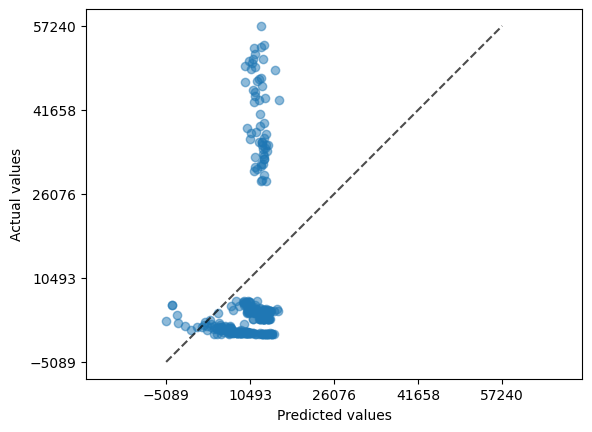

In [497]:
PredictionErrorDisplay.from_predictions(
    y_val,
    model.predict(X_val_prep),
    kind="actual_vs_predicted",
    scatter_kwargs={"alpha": 0.5},
);

Небольшие выводы по модели:

* Используя только 4 числовых признака можно неплохо предсказывать объем продаж

* Больше проблем при предсказании высоких объемов продаж

* Увеличение количества рейтингов, цены книги и возраста положительно сказывается на объеме продаж, рейтинга книги - отрицательно

## Объединяем Pipeline Предобработки и Модель

In [498]:
pipe_num = Pipeline([
    ('preprocessors', preprocessors_num),
    ('model', SGDRegressor(random_state = 42))
])

In [499]:
pipe_num['model']

SGDRegressor(random_state=42)

In [500]:
pipe_num.fit(X_train, y_train)

Pipeline(steps=[('preprocessors',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('QuantReplace',
                                                                   QuantileReplacer(threshold=0.01)),
                                                                  ('norm',
                                                                   MinMaxScaler())]),
                                                  ['Age', 'Book_average_rating',
                                                   'Book_ratings_count',
                                                   'sale price', 'gross sales',
                                                   'publisher revenue'])])),
                ('model', SGDRegressor(random_state=42))])

In [501]:
B0, B = get_coefs(pipe_num['model'])
features_names = list(columns_num)

print_model (B0,B,features_names)

Решение
14402.717-1259.42*Age+1979.23*Book_average_rating-12844.76*Book_ratings_count+111.83*sale price-8150.47*gross sales-1992.76*publisher revenue


In [502]:
print(f"r2 на тренировочной выборке: {calculate_metric(pipe_num, X_train, y_train):.4f}")
print(f"r2 на валидационной выборке: {calculate_metric(pipe_num, X_val, y_val):.4f}")

print(f"mse на тренировочной выборке: {calculate_metric(pipe_num, X_train, y_train, mse):.4f}")
print(f"mse на валидационной выборке: {calculate_metric(pipe_num, X_val, y_val, mse):.4f}")

print(f"rmse на тренировочной выборке: {calculate_metric(pipe_num, X_train, y_train, mse, squared = False):.4f}")
print(f"rmse на валидационной выборке: {calculate_metric(pipe_num, X_val, y_val, mse, squared = False):.4f}")

r2 на тренировочной выборке: 0.0716
r2 на валидационной выборке: 0.0755
mse на тренировочной выборке: 223702151.0337
mse на валидационной выборке: 214855123.7526
rmse на тренировочной выборке: 14956.6758
rmse на валидационной выборке: 14657.9372


In [503]:
cross_validation (X_train, y_train,
                  pipe_num,
                  scoring_reg,
                  ShuffleSplit(n_splits=5, random_state = 42))

Ошибка на кросс-валидации


,fit_time,score_time,test_R2,test_-MSE,test_-MAE,test_-Max
0,0.017997,0.006006,0.008640,-2.804485e+08,-12969.098037,-50990.900438
1,0.017997,0.011999,0.052870,-2.171178e+08,-10891.432880,-46156.751400
2,0.016999,0.006004,0.074522,-2.216750e+08,-11838.570054,-36958.755210
3,0.014995,0.006003,0.063327,-1.966391e+08,-11472.200677,-41101.252116
4,0.015996,0.005003,0.032848,-2.801005e+08,-12733.176128,-50021.094346




test_R2      4.644156e-02
test_-MSE   -2.391962e+08
test_-MAE   -1.198090e+04
test_-Max   -4.504575e+04
dtype: float64


## Оценим влияние предварительной обработки целевой переменной

In [504]:
pipe_num_transform = Pipeline([
    ('preprocessors', preprocessors_num),
    ('model', TransformedTargetRegressor( regressor=SGDRegressor(random_state = 42),
    transformer=PowerTransformer())
    )
])

In [505]:
pipe_num_transform.fit(X_train, y_train)

Pipeline(steps=[('preprocessors',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('QuantReplace',
                                                                   QuantileReplacer(threshold=0.01)),
                                                                  ('norm',
                                                                   MinMaxScaler())]),
                                                  ['Age', 'Book_average_rating',
                                                   'Book_ratings_count',
                                                   'sale price', 'gross sales',
                                                   'publisher revenue'])])),
                ('model',
                 TransformedTargetRegressor(regressor=SGDRegressor(random_state=42),
                                            transformer=PowerTransformer()))])

In [506]:
B0, B = get_coefs(pipe_num_transform['model'].regressor_)
features_names = list(columns_num)

print_model (B0,B,features_names)

Решение
0.137-0.05*Age+0.10*Book_average_rating-0.44*Book_ratings_count-0.00*sale price-0.35*gross sales-0.07*publisher revenue


In [507]:
Bs = np.hstack([B0,B])
vis_weigths(Bs,features_names)

Влияние Book_rating_count уступило влиянию sale price, остальные соотношения сильно не изменились.

In [508]:
cross_validation (X_train, y_train,
                  pipe_num_transform,
                  scoring_reg,
                  ShuffleSplit(n_splits=5, random_state = 42))

Ошибка на кросс-валидации


,fit_time,score_time,test_R2,test_-MSE,test_-MAE,test_-Max
0,0.018994,0.006002,-0.310219,-3.706514e+08,-10743.670168,-58403.975116
1,0.015000,0.005999,-0.194700,-2.738703e+08,-8379.815922,-52976.497009
2,0.015000,0.004998,-0.195518,-2.863562e+08,-9168.155356,-44677.736308
3,0.015002,0.006000,-0.267779,-2.661494e+08,-8901.767424,-49871.105718
4,0.015999,0.006003,-0.155702,-3.347073e+08,-9060.620963,-57629.470834




test_R2     -2.247837e-01
test_-MSE   -3.063469e+08
test_-MAE   -9.250806e+03
test_-Max   -5.271176e+04
dtype: float64


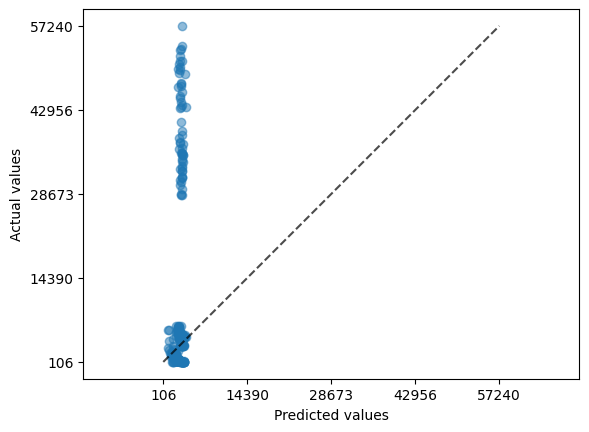

In [509]:
PredictionErrorDisplay.from_predictions(
    y_val,
    pipe_num_transform.predict(X_val),
    kind="actual_vs_predicted",
    scatter_kwargs={"alpha": 0.5},
);

Небольшие выводы по модели:

* Предварительная обработка целевой переменной немного улучшает результаты линейной модели (метрика r2 на кроссвалидации 3.16 против 2.9)

* В целом предварительная обработка целевой переменной сделала хуже предсказание высоких значений цен

* В области низких цен кластеризация несколько уменьшилась, но не ушла полностью (косвенно подтверждает гипотезу о влиянии ограниченного набора значений числовых признаков) !!!



# Оценим влияние категориальных признаков

In [510]:
pipe_all_transform = Pipeline([
    ('preprocessors', preprocessors_All),
    ('model', TransformedTargetRegressor( regressor=SGDRegressor(random_state = 42),
    transformer=PowerTransformer())
    )
])

In [511]:
pipe_all_transform.fit(X_train, y_train)

Pipeline(steps=[('preprocessors',
                 ColumnTransformer(transformers=[('norm',
                                                  Pipeline(steps=[('QuantReplace',
                                                                   QuantileReplacer(threshold=0.01)),
                                                                  ('norm',
                                                                   MinMaxScaler())]),
                                                  ['Age', 'Book_average_rating',
                                                   'Book_ratings_count',
                                                   'sale price', 'gross sales',
                                                   'publisher revenue']),
                                                 ('Status_Touch',
                                                  Pipeline(steps=[('encoder',
                                                                   OrdinalEncoder())]),
                                                  ['Author_Rating', 'genre']),
                                                 ('cat',
                                                  Pipeline(steps=[('replace_rare',
                                                                   RareGrouper(threshold=0.0001)),
                                                                  ('encoder',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Author_Rating', 'Author',
                                                   'language_code', 'genre',
                                                   'Publisher'])])),
                ('model',
                 TransformedTargetRegressor(regressor=SGDRegressor(random_state=42),
                                            transformer=PowerTransformer()))])

In [512]:
cat_Status_Touch_names = pipe_all_transform['preprocessors'].transformers_[1][
    1]['encoder'].get_feature_names_out(cat_Status_Touch)
cat_names = pipe_all_transform['preprocessors'].transformers_[2][1][
    'encoder'].get_feature_names_out(cat)

# объединяем названия колонок в один список (важен порядок как в ColumnTransformer)
columns = np.hstack([num, cat_Status_Touch, cat])

In [513]:
B0, B = get_coefs(pipe_all_transform['model'].regressor_)
features_names = list(columns)

print_model (B0,B,features_names)

Решение
0.110-0.05*Age-0.35*Book_average_rating-0.52*Book_ratings_count-0.03*sale price-0.51*gross sales+0.12*publisher revenue-0.15*Author_Rating+0.11*genre+0.16*Author_Rating+0.00*Author-0.00*language_code-0.05*genre-0.10*Publisher


In [514]:
def vis_weigths_threshold(weights, feature_names, threshold, width = 1200, height = 600):
    """Отрисовка весов с фильтром.
    Входные переменные:
    ===========
    weights: веса признаков
    features_names: список названий признаков
    threshold: порог "значимости" коэффициентов
    """
    # фильтруем веса коэффициентов
    mask = np.abs(weights) >= threshold
    weights_filtered = weights[mask]
    feature_names_filtered = [name for name, m in zip(feature_names, mask[1:]) if m]

    # Рисуем столбчатую диаграмму
    vis_weigths(weights_filtered,feature_names_filtered, width = width, height = height)

In [515]:
Bs = np.hstack([B0,B])
vis_weigths_threshold(Bs,columns, 0.08, width = 1800)

In [516]:
cat_names  # Можно посмотреть, что скрывается за индексами

array(['Author_Rating_Excellent', 'Author_Rating_Famous',
       'Author_Rating_Intermediate', 'Author_Rating_Novice',
       'Author_A.A. Milne, Ernest H. Shepard', 'Author_Abbi Glines',
       'Author_Adam Johnson', 'Author_Adam Mansbach, Ricardo CortÃ©s',
       'Author_Agatha Christie', 'Author_Alan Bradley',
       'Author_Alan Brennert',
       'Author_Aldous Huxley, Christopher Hitchens',
       'Author_Aleksandr Solzhenitsyn, H.T. Willetts',
       'Author_Alex Flinn', 'Author_Alex Garland', 'Author_Alice Clayton',
       'Author_Allen Ginsberg, William Carlos Williams',
       'Author_Ally Carter', 'Author_Ally Condie',
       'Author_Amish Tripathi', 'Author_Andre Dubus III',
       'Author_Andrew Clements, Brian Selznick', 'Author_Angie Sage',
       'Author_Anita Shreve', 'Author_Ann Patchett',
       'Author_Anna Quindlen',
       'Author_Anne McCaffrey, Teodor PanasiÅ„ski', 'Author_Anne Rice',
       'Author_Anne Tyler', 'Author_Anne Tyler, Jennifer Bassett',
       'Auth

In [517]:
print(f"r2 на тренировочной выборке: {calculate_metric(pipe_all_transform, X_train, y_train):.4f}")
print(f"r2 на валидационной выборке: {calculate_metric(pipe_all_transform, X_val, y_val):.4f}")

print(f"mse на тренировочной выборке: {calculate_metric(pipe_all_transform, X_train, y_train, mse):.4f}")
print(f"mse на валидационной выборке: {calculate_metric(pipe_all_transform, X_val, y_val, mse):.4f}")

print(f"rmse на тренировочной выборке: {calculate_metric(pipe_all_transform, X_train, y_train, mse, squared = False):.4f}")
print(f"rmse на валидационной выборке: {calculate_metric(pipe_all_transform, X_val, y_val, mse, squared = False):.4f}")

r2 на тренировочной выборке: -0.1209
r2 на валидационной выборке: -0.1421
mse на тренировочной выборке: 270088779.9946
mse на валидационной выборке: 265408901.2321
rmse на тренировочной выборке: 16434.3780
rmse на валидационной выборке: 16291.3751


In [518]:
cross_validation (X_train, y_train,
                  pipe_all_transform,
                  scoring_reg,
                  ShuffleSplit(n_splits=5, random_state = 73))

Ошибка на кросс-валидации


,fit_time,score_time,test_R2,test_-MSE,test_-MAE,test_-Max
0,0.054999,0.010005,-0.015748,-1.010748e+08,-4648.498746,-42537.695808
1,0.049997,0.010003,-0.217699,-3.233100e+08,-9944.076348,-55058.057702
2,0.043997,0.011003,-0.162551,-2.419321e+08,-7982.503593,-47762.248313
3,0.063997,0.010004,-0.332635,-4.091932e+08,-11841.809033,-49435.533562
4,0.054011,0.011986,-0.160140,-2.060878e+08,-7336.680960,-49394.842173




test_R2     -1.777546e-01
test_-MSE   -2.563196e+08
test_-MAE   -8.350714e+03
test_-Max   -4.883768e+04
dtype: float64


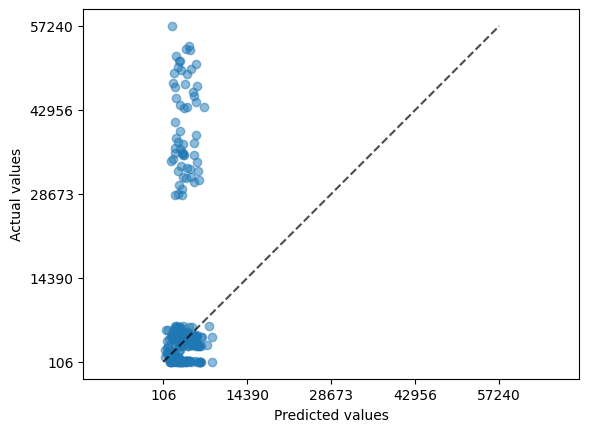

In [519]:
PredictionErrorDisplay.from_predictions(
    y_val,
    pipe_all_transform.predict(X_val),
    kind="actual_vs_predicted",
    scatter_kwargs={"alpha": 0.5},
);

Выводы по модели:

* Добавление категориальных признаков улучшает результаты линейной модели (метрика r2 на кроссвалидации 0.74 против 0.58)

* Результаты так явно не кластеризуются

* Предсказание дорогих ноутбуков немного улучшилось, в предсказании средних по цене все еще проблема.

* Наиболее значимыми оказались числовые признаки: объем накопителя и оперативной памяти.

